# Portfolio Project: Life Expectancy and GDP

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First step is to see what type of data is available to us.
This includes ascertaining what variables are categorical or quantitative, and what the units are.
This will inform what relationships can be explored and the most appropriate data visualisation methods to do so.

In [61]:
df = pd.read_csv('all_data.csv')
print(df.head())
print("Observations: " + str(len(df)))
countries = pd.unique(df.Country)
years = pd.unique(df.Year)
print(years)
#Appears there is no missing data based on the number of countries (6) and number of years (16)
#Check that each country as 16 observations each to confirm.
print(df.groupby('Country').count())
print(df.groupby('Year').count())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Observations: 96
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
                          Year  Life expectancy at birth (years)  GDP
Country                                                              
Chile                       16                                16   16
China                       16                                16   16
Germany                     16                                16   16
Mexico                      16                                16   16
United States of America    16                                16   16
Zimbabwe                  

From the above, we can see that the dataset contains 96 observations. Each observation is data for a country's life expectancy and GDP for a given year. Based on an inital viewing of the data, there are 6 countries with data ranging from the year 2000 - 2015.

The variables in each observation are:
* Country (Categorical)
* Calendar Year (Quantitative - although could be considered categorical depending on use)
* Life expectancy (in years) for the given year (Quantitative)
* GDP for the calendar year (no units provided, presambly US$) (Quantitative)

Planning relationships to explore:
* Time series comparing the growth or decline of life expectancy over years for each country - thinking line chart with six lines.
* Scatter plot or possibly linear regression to analyse relationship between GDP and life expectancy - hypothesis is that they are positively correlated.
* Mean GDP for the 16 year period for each country - use bar chart with error
* Time series for Mean GDP for all countries - line graph with error

### Change in life expectancy over time; comparison by country

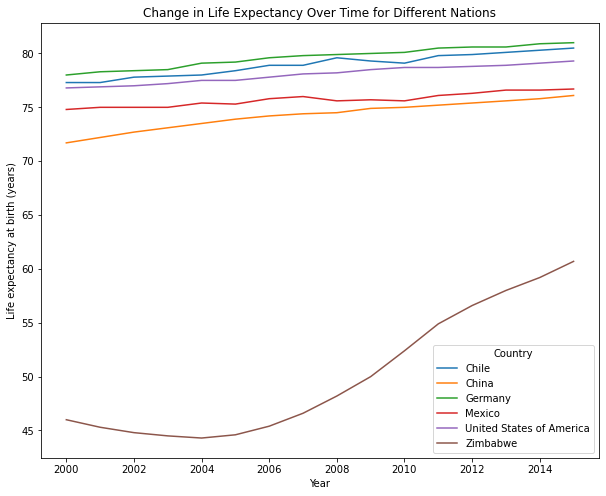

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x="Year", y="Life expectancy at birth (years)",
             hue="Country",
             data=df)
plt.title('Change in Life Expectancy Over Time for Different Nations')
plt.savefig('time_series_life_expectancy.pdf')
plt.show()
plt.clf()

The primary observation available from the above is the significant gap between Zimbabwe and the other nations.
At the lowest point in 2004, it was almost 30 years below the next lowest, China.
Across the 16 year time series, the gap between the second lowest life expectancy (China) and the highest (Germany) appears to be consistently around 5 years.
However, after this low point in 2004, we see a rapid growth in Zimbabwe's life expectancy for the remainder of the time period.

In [41]:
zim_min = (df[df.Country=='Zimbabwe']['Life expectancy at birth (years)'].min())
zim_max = (df[df.Country=='Zimbabwe']['Life expectancy at birth (years)'].max())
print("Growth from Zimbabwe's lowest to highest life expectancy: " + str(round((zim_max - zim_min), 2)) + ' years')

Growth from Zimbabwe's lowest to highest life expectancy: 16.4 years


## Relationship between GDP and Life Expectancy

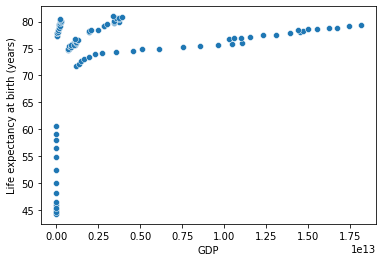

80    6.689958e+09
81    6.777385e+09
82    6.342116e+09
83    5.727592e+09
84    5.805598e+09
85    5.755215e+09
86    5.443896e+09
87    5.291950e+09
88    4.415703e+09
89    8.621574e+09
90    1.014186e+10
91    1.209845e+10
92    1.424249e+10
93    1.545177e+10
94    1.589105e+10
95    1.630467e+10
Name: GDP, dtype: float64


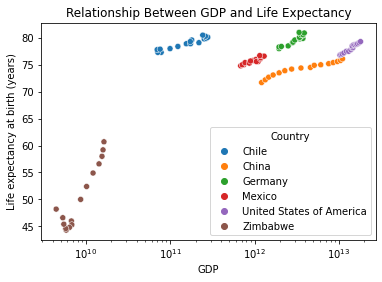

<Figure size 432x288 with 0 Axes>

In [11]:
#Scatter plot
sns.scatterplot(data=df, x = 'GDP', y = 'Life expectancy at birth (years)')
plt.show()
plt.clf()
#Potential that Zimbabwe's GDP data is missing, or too small to be distinguished on the same axes as other nations.
print(df[df.Country == 'Zimbabwe']['GDP'])
#Data is not missing, but too small (comparatively). A log scale might be more appropriate:
sns.scatterplot(data=df, x = 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.xscale('log')
plt.title('Relationship Between GDP and Life Expectancy')
plt.savefig('Life_expectancy_vs_GDP.pdf')
plt.show()
plt.clf()

The datapoints on the figure above are clustered very noticeably according to the nation from which they originate. It seems that the most significant relationships evident from the figure above are between nation and GDP, and nation and life expectancy. Although the data above shows, for each nation, a growth in GDP correlates with a growth in life expectancy, GDP is not an accurate predictor of life expectancy.
If we were to explore this relationship with many more nations in the dataset, there might be a tendency for countries with lower life expectancy (like Zimbabwe) to have lower GDP, and vice versa. But this does not mean there is an actual relationship between GDP and life expectancy.
For example, in the previous line graph of life expectancy vs time, we saw that Chile had a higher life expectancy than the USA over the period. However, USA has a GDP which is around 100x the size of Chile.
Similarly, there is a noticeable difference in life expectancy between China and Germany, at comparable GDP.

It is my opinion that a nation's life expectancy is the product of multiple variables (one of which is likey GDP) and would require a more comprehensive dataset to perform further exploratory analysis on.

Based on the spread of GDP based on nation, I think it is worth exploring the same time series as before, but with GDP on the y-axis. 

### Change in GDP over time; comparison by country

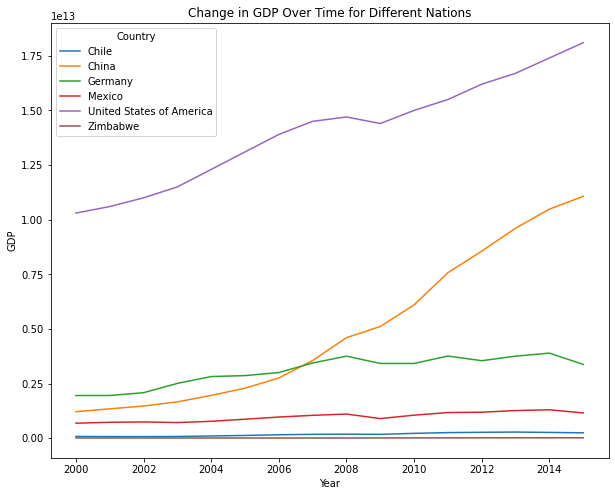

<Figure size 432x288 with 0 Axes>

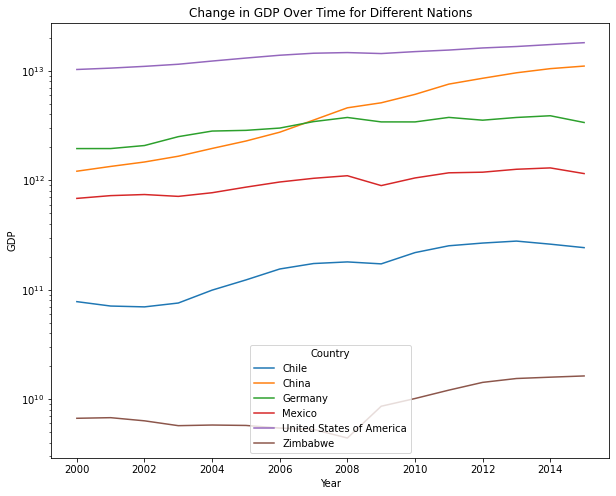

[211.48, 813.42, 73.11, 68.55, 75.73, 143.72]
['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


<Figure size 432x288 with 0 Axes>

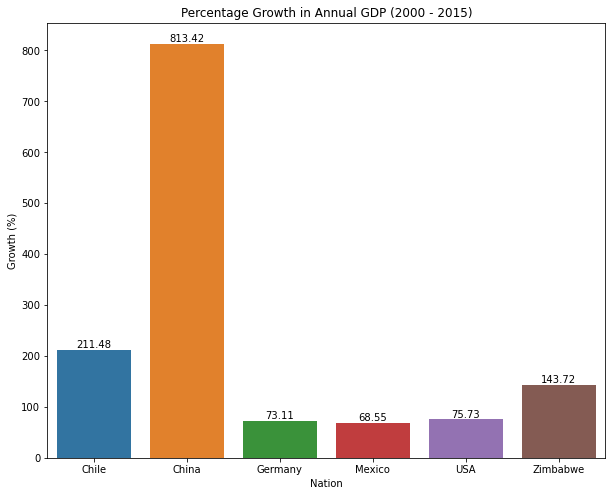

<Figure size 432x288 with 0 Axes>

In [60]:
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x="Year", y="GDP",
             hue="Country",
             data=df)
plt.title('Change in GDP Over Time for Different Nations')
plt.show()
plt.clf()

#Test with log scale - should provide a clearer picture for the nations with smaller GDP
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x="Year", y="GDP",
             hue="Country",
             data=df)
plt.yscale('log')
plt.title('Change in GDP Over Time for Different Nations')
plt.savefig('GDP_change_log_scale.pdf')
plt.show()
plt.clf()
#Can see from the log scale that China has had the most significant growth in GDP over the period.
#Interested to see what the percentage change from 2000 - 2015 is. Will calculate this and graph using bar chart to compare.
countries = df.Country.unique()
GDP_change = []
for i in countries:
    GDP_begin = float(df[(df.Country == i) & (df.Year == 2000)]['GDP'])
    GDP_end = float(df[(df.Country == i) & (df.Year == 2015)]['GDP'])
    perc_change = round((((GDP_end - GDP_begin)/(GDP_begin))*100), 2)
    GDP_change.append(perc_change)
print(GDP_change)
#Change United States of America to USA to make it smaller for x-axis ticks
countries[4] = 'USA'
print(countries)
#Create dataframe 
plt.figure(figsize=(10,8))
bplot = sns.barplot(x=countries, y =GDP_change)
plt.ylabel('Growth (%)')
plt.xlabel('Nation')
plt.bar_label(bplot.containers[0])
plt.title('Percentage Growth in Annual GDP (2000 - 2015)')
plt.savefig('Percentage_Growth_GDP.pdf')
plt.show()
plt.clf()



The time series with y-axis log scale and, particularly, the bar chart show how signifcant the growth in China's GDP was across the 16 year period. It had almost 4x as much growth as the next highest (Chile) and over 10x as much growth as Germany, Mexico and the USA.

I consider the three graphs above to be more valuable than the planned graph of comparing mean GDP using a bar chart. Simply using the mean does not capture the change across the 16 year period, unless we used something like minimum and maximum as error bars. I consider both the line graphs above to be more effective at capturing the range of values across the time period than error bars.

Provided the reader has an understanding of log scales, the 2nd line graph will be the most effective at contextualising the signifcant difference between the size of the nations' economies. It also shows the growth in the nations' GDP, but the bar graph does a much better job at contextualising this information and demonstrating which nations grew the most, relative to the size of their economies.

Similarly, I think the graphs above provide a lot more information about the growth in GDP for all nations than would be available by simply taking the mean of each nation's GDP for the years 2000 - 2015 and plotting a time series. It is my opinion that this only serve to take away the valuable insight into how much some countries grew compared to the rest, and the significant difference in the size of the nation's economies. For this reason, I will not complete that plot as initially planned.
